# Unsupervised Learning with K-Means and PCA

This is a starter notebook for the assignment, as outlined in the accompanying README file. Learners are expected to complete and deliver all their work for this portion of the assignment within this notebook.

In [ ]:
# run this only once and then comment it out/delete the cell
! pip install ucimlrepo

In [ ]:
# import the dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets


In [ ]:
# Look at the first 5 rows of our features (the X data)
print("First 5 rows of the data:")
print(X.head())

# Get a summary of the data, like how many rows and columns we have,
# and if there are any missing values
print("\nSummary of the data:")
print(X.info())

# See some basic statistics for each column, like the average and min/max
print("\nDescriptive statistics:")
print(X.describe())

First 5 rows of the data:
   Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2  12669  9656     7561     214              2674        1338
1        2   7057  9810     9568    1762              3293        1776
2        2   6353  8808     7684    2405              3516        7844
3        1  13265  1196     4221    6404               507        1788
4        2  22615  5410     7198    3915              1777        5185

Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)


In [ ]:
print(X.columns)

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')


In [ ]:
import pandas as pd

# This time, we only have 'Channel' to one-hot encode
columns_to_encode = ['Channel']

# Use pd.get_dummies on our data
X_preprocessed = pd.get_dummies(X, columns=columns_to_encode, drop_first=False)

# Let's check the new dataframe
print("First 5 rows of the one-hot encoded data:")
print(X_preprocessed.head())
print("\nNew summary of the data:")
print(X_preprocessed.info())

First 5 rows of the one-hot encoded data:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Channel_1  \
0  12669  9656     7561     214              2674        1338      False   
1   7057  9810     9568    1762              3293        1776      False   
2   6353  8808     7684    2405              3516        7844      False   
3  13265  1196     4221    6404               507        1788       True   
4  22615  5410     7198    3915              1777        5185      False   

   Channel_2  
0       True  
1       True  
2       True  
3      False  
4       True  

New summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Deterg

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# The StandardScaler will make sure all columns are on a fair scale
scaler = StandardScaler()

# We fit the scaler to our data and then transform it.
# This learns the mean and standard deviation from our data,
# then uses them to scale all the values.
X_scaled_array = scaler.fit_transform(X_preprocessed)

# The output from the scaler is not a dataframe, so we will convert it back.
X_scaled = pd.DataFrame(X_scaled_array, columns=X_preprocessed.columns)

# Let's see the new, scaled data
print("First 5 rows of the scaled data:")
print(X_scaled.head())
print("\nDescriptive statistics of the scaled data:")
print(X_scaled.describe())

First 5 rows of the scaled data:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   

   Channel_1  Channel_2  
0  -1.448652   1.448652  
1  -1.448652   1.448652  
2  -1.448652   1.448652  
3   0.690297  -0.690297  
4  -1.448652   1.448652  

Descriptive statistics of the scaled data:
              Fresh        Milk       Grocery        Frozen  Detergents_Paper  \
count  4.400000e+02  440.000000  4.400000e+02  4.400000e+02      4.400000e+02   
mean  -3.431598e-17    0.000000 -4.037175e-17  3.633457e-17      2.422305e-17   
std    1.001138e+00    1.001138  1.001138e+00  1.001138e+00      1.001138

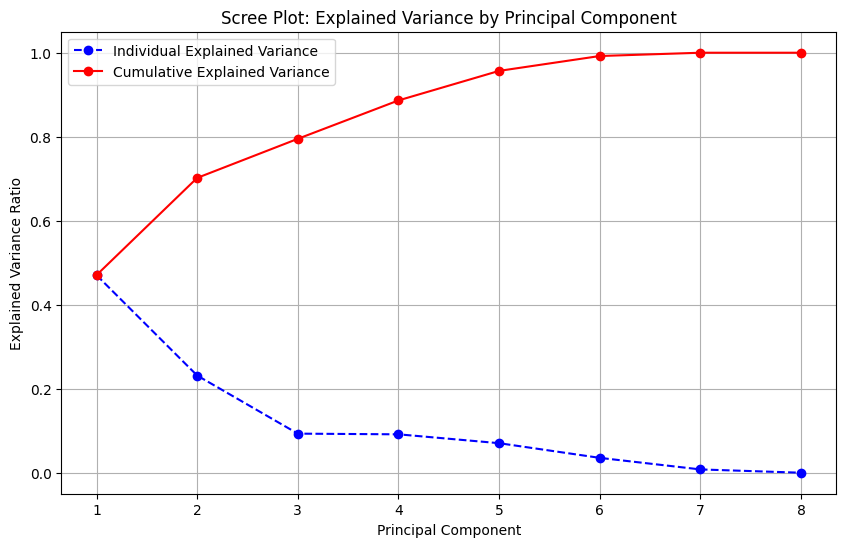

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object. We don't specify the number of components yet.
pca = PCA()

# Fit PCA to our scaled data
pca.fit(X_scaled)

# Get the explained variance ratio from the PCA model
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Now, let's create the scree plot
plt.figure(figsize=(10, 6))

# Plot the individual explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
         marker='o', linestyle='--', color='blue', label='Individual Explained Variance')

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')

# Add titles and labels for clarity
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

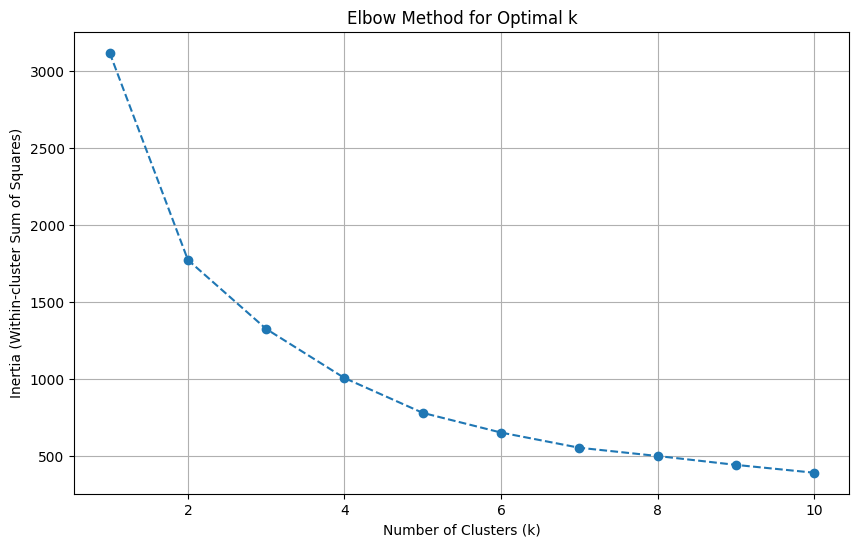

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We'll test a range of k values, from 1 to 10.
k_values = range(1, 11)
inertia_values = []

# We need to perform PCA again, but this time, we specify 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Now, we run K-Means for each value of k and record its inertia
for k in k_values:
    # We use n_init=10 to avoid any random initialization issues
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Let's create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

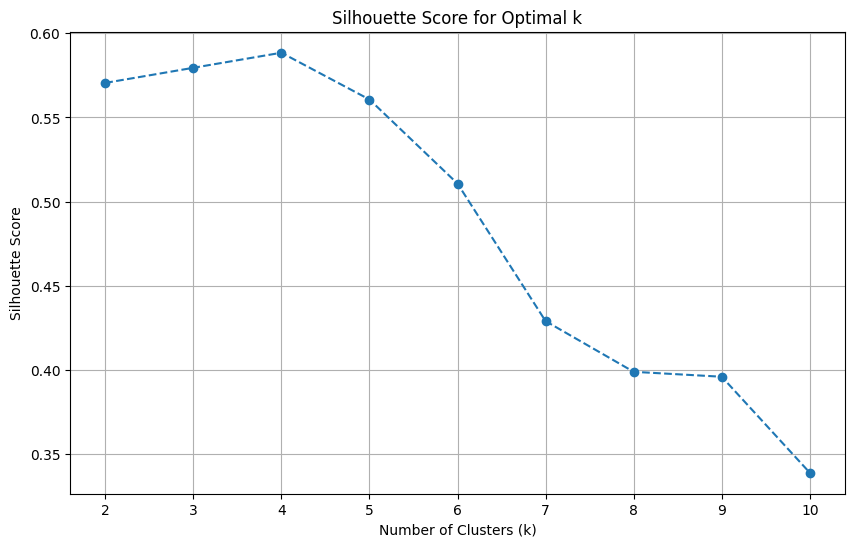

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# We'll test a range of k values, from 2 to 10
# Note: Silhouette score cannot be calculated for k=1, so we start at 2
k_values = range(2, 11)
silhouette_scores = []

# Remember, we're using our PCA-reduced data from the last step
# (X_pca, which we created in the last code block)

for k in k_values:
    # Set up and fit the K-Means model for each k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)

    # Calculate the silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Now, let's plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Our optimal number of clusters is 4
optimal_k = 4

# --- Model 1: Using the Original Scaled Data ---
print("--- K-Means on Original Scaled Data ---")
# Fit the model
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(X_scaled)

# Calculate the silhouette score
silhouette_original = silhouette_score(X_scaled, labels_original)
print(f"Silhouette Score (Original Data): {silhouette_original:.4f}")


# --- Model 2: Using the PCA-Reduced Data ---
print("\n--- K-Means on PCA-Reduced Data (4 Components) ---")
# Remember the PCA-reduced data we created earlier: X_pca
# Fit the model
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Calculate the silhouette score
silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score (PCA-Reduced Data): {silhouette_pca:.4f}")

--- K-Means on Original Scaled Data ---
Silhouette Score (Original Data): 0.5261

--- K-Means on PCA-Reduced Data (4 Components) ---
Silhouette Score (PCA-Reduced Data): 0.5885


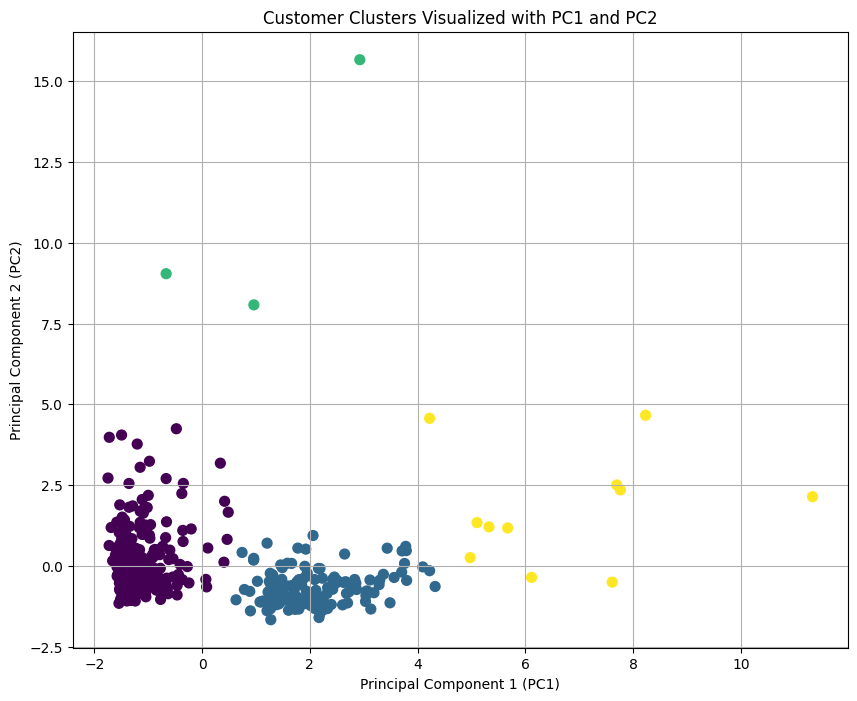

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Perform PCA, but this time, we only keep 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Step 2: Run K-Means on the 2-component data
# We already know the best number of clusters is 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca_2d)

# Step 3: Create the scatter plot
plt.figure(figsize=(10, 8))

# We'll plot each point, coloring it based on its cluster label
# 'c' is the color, which we set to our cluster labels
# 'cmap' sets the color scheme
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Add titles and labels
plt.title('Customer Clusters Visualized with PC1 and PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# We'll re-run PCA with 2 components, just to be sure we have the correct object
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get the feature names from our scaled dataframe
feature_names = X_scaled.columns

# The 'pca.components_' tells us the contribution of each original feature
# We'll put it in a dataframe to make it easy to read
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2'])

print("Component Contributions:")
print(components_df)

Component Contributions:
        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
PC1 -0.058499  0.392115  0.463692 -0.068562          0.462386    0.106918   
PC2  0.485536  0.295502  0.100569  0.564438         -0.010742    0.541150   

     Channel_1  Channel_2  
PC1  -0.446027   0.446027  
PC2   0.166238  -0.166238  


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# We will use the PCA-reduced data to get our cluster labels,
# since it gave us the best performance
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Now, we will add the cluster labels back to our preprocessed data
# This lets us see the original values for each cluster
data_with_clusters = X_preprocessed.copy()
data_with_clusters['Cluster'] = cluster_labels

# The final step is to calculate the average for each feature, for each cluster
cluster_insights = data_with_clusters.groupby('Cluster').mean()

print("Cluster Insights (Average Feature Values by Cluster):")
print(cluster_insights)

Cluster Insights (Average Feature Values by Cluster):
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        12996.616949   3180.518644   3826.349153   3399.427119   
1         8232.000000   8688.816794  13820.282443   1518.862595   
2        16911.090909  34864.363636  46126.181818   3245.454545   
3        60571.666667  30120.333333  17314.666667  38049.333333   

         Detergents_Paper    Delicassen  Channel_1  Channel_2  
Cluster                                                        
0              776.705085   1219.840678        1.0        0.0  
1             5947.946565   1549.900763        0.0        1.0  
2            23008.090909   4177.363636        0.0        1.0  
3             2153.000000  20700.666667        1.0        0.0  
